# Dataset Selection

# Step 1: Load and Explore the Dataset

In [34]:
import pandas as pd

df = pd.read_csv("heart.csv")
print(df.info())  # Dataset structure
print(df.describe())  # Statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

# Step 2: Data Cleaning – Missing & Duplicates

In [35]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicate rows: 0


In [36]:
# Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert Categorical to Numeric (Encoding)

In [37]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [38]:
# Check if any object columns remain
print("Remaining object columns:", df.select_dtypes(include='object').columns)

Remaining object columns: Index([], dtype='object')


# Step 4: Feature Scaling (Standardization)

In [39]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Step 5: Exploratory Data Analysis (EDA)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

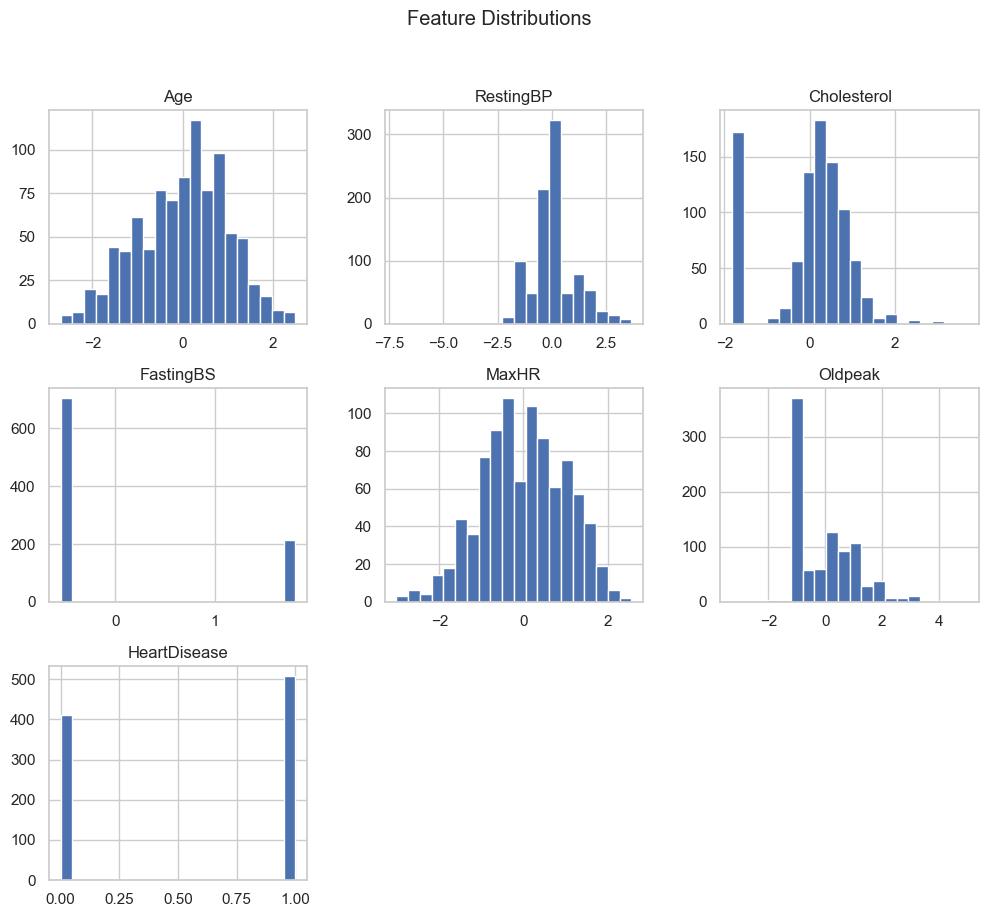

In [41]:

# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

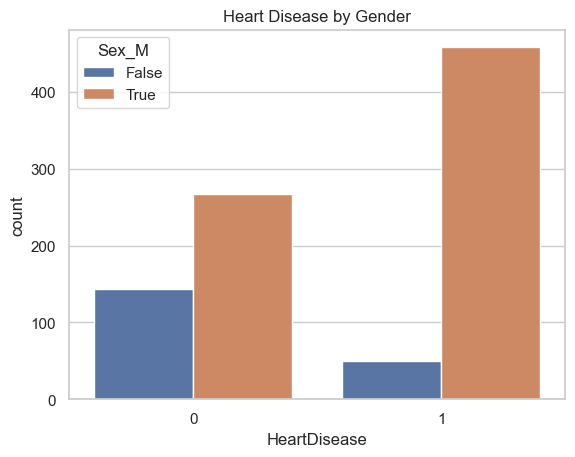

In [42]:
# Bar plot: HeartDisease vs Gender
sns.countplot(x='HeartDisease', hue='Sex_M', data=df)
plt.title("Heart Disease by Gender")
plt.show()

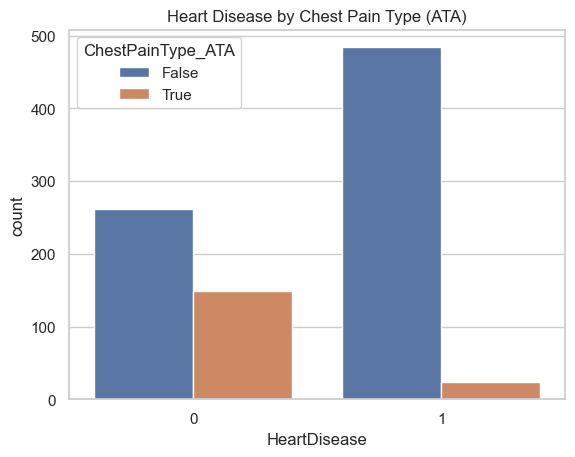

In [43]:
# Bar plot: HeartDisease vs Chest Pain
sns.countplot(x='HeartDisease', hue='ChestPainType_ATA', data=df)
plt.title("Heart Disease by Chest Pain Type (ATA)")
plt.show()

# Step 6: Feature Selection – Correlation

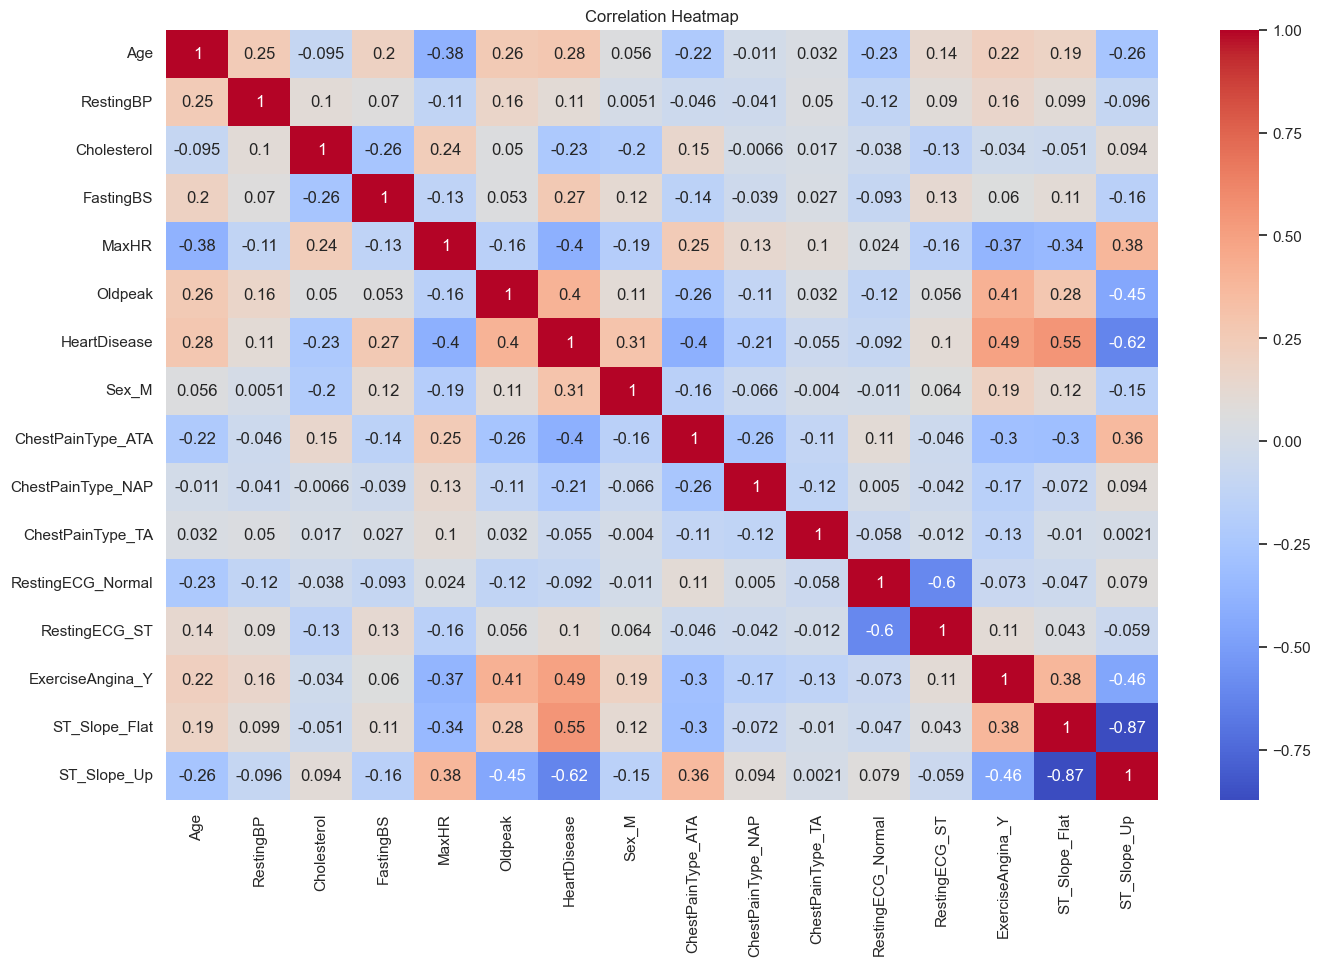

In [44]:
plt.figure(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Step 7: Feature Importance – Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


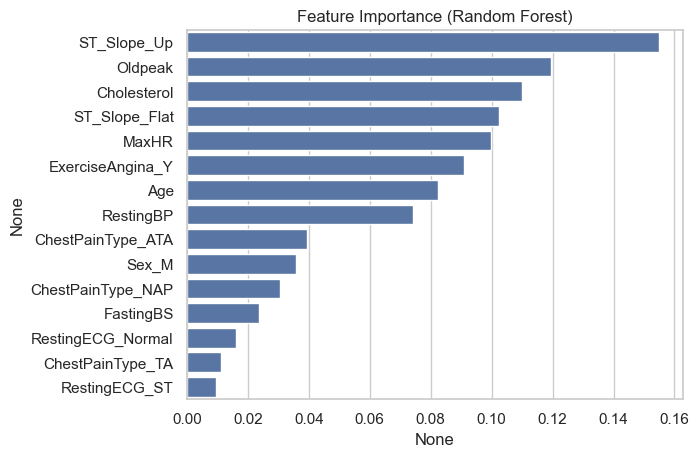

In [46]:
# Show importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

#  Step 8: Model Training & Evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [48]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


In [49]:

print("🔷 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))


🔷 Logistic Regression
Accuracy: 0.8858695652173914
[[68 14]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [50]:
# Model 2: Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)


In [51]:
print("🟢 Decision Tree")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print(confusion_matrix(y_test, tree_preds))
print(classification_report(y_test, tree_preds))

🟢 Decision Tree
Accuracy: 0.7934782608695652
[[60 22]
 [16 86]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        82
           1       0.80      0.84      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



#  Step 9: Hyperparameter Tuning – GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5)
grid.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [53]:
print("Best Parameters:", grid.best_params_)
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
print("Tuned Decision Tree Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Tuned Decision Tree Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        82
           1       0.78      0.91      0.84       102

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.82      0.81      0.81       184



In [54]:
# Save the model for deployment
import joblib
joblib.dump(best_tree, "best_model.pkl")

['best_model.pkl']

In [55]:
import joblib

# Load the saved model
model = joblib.load("best_model.pkl")

# Create sample input (based on the same feature order used during training)
input_data = [[
    52,     # Age
    120,    # RestingBP
    250,    # Cholesterol
    1,      # FastingBS
    140,    # MaxHR
    1.5,    # Oldpeak
    1,      # Sex_M (1=Male, 0=Female)
    0,      # ChestPainType_ATA
    1,      # ChestPainType_NAP
    0,      # ChestPainType_TA
    0,      # RestingECG_Normal
    1,      # RestingECG_ST
    0,      # ExerciseAngina_Y
    1,      # ST_Slope_Flat
    0       # ST_Slope_Up
]]


# Predict
result = model.predict(input_data)
print("Prediction:", result[0])  # 0 = No Heart Disease, 1 = Yes



Prediction: 1


c:\Users\mmuda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
